In [256]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [263]:
# Update the file path to match your local directory
file_path = r"./datasets/twitter_training.csv"

# Load only the first 10,000 rows
df = pd.read_csv(file_path, header=None, names=['number', 'Border', 'label', 'message'], nrows=5000)

# Display the number of rows and the first few rows
print(f"Number of rows loaded: {df.shape[0]}")
print(df.head())


Number of rows loaded: 5000
   number       Border     label  \
0    2401  Borderlands  Positive   
1    2401  Borderlands  Positive   
2    2401  Borderlands  Positive   
3    2401  Borderlands  Positive   
4    2401  Borderlands  Positive   

                                             message  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [264]:
display(df['label'].value_counts())

label
Positive      1938
Neutral       1166
Negative      1056
Irrelevant     840
Name: count, dtype: int64

In [265]:
df.drop(['Border' , 'number'] , axis=1 , inplace = True)



In [266]:
df.shape

(5000, 2)

In [267]:
df.isnull().sum()

label       0
message    48
dtype: int64

In [268]:
df.dropna(inplace = True)

In [269]:
df.shape

(4952, 2)

Preprocessing

In [270]:
df['message'] = df['message'].str.lower()

df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


Remove HTMLs

In [271]:
from bs4 import BeautifulSoup

def remove_html(text):

    clean_text = BeautifulSoup(text , 'html.parser')

    return clean_text.get_text()

In [272]:
df['message'] = df['message'].apply(remove_html)

display(df['message'].head(2))

C:\Users\Jan\AppData\Local\Temp\ipykernel_1792\781006695.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text , 'html.parser')


0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
Name: message, dtype: object

In [273]:
import re

def clean_url(text):
    
    return re.sub(r'http\S+|www\S+', '', text)

In [274]:
df['message'] = df['message'].apply(clean_url)

df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


Remove Punctiations

In [275]:
def remove_punctuation(text):
    
    return re.sub(r'[^\w\s]', '', text)

In [276]:
df['message'] = df['message'].apply(remove_punctuation)

df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


Remove Stop Words

In [277]:
import spacy

nlp = spacy.load("en_core_web_sm")

def remove_stopwords(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return text
        
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])

In [278]:
df['message'] = df['message'].apply(remove_stopwords)

In [279]:
df.head()

,label,message
0,Positive,m getting borderlands murder
1,Positive,coming borders kill
2,Positive,m getting borderlands kill
3,Positive,m coming borderlands murder
4,Positive,m getting borderlands 2 murder


Remove Emoji

In [280]:
import emoji

def remove_emojis(text):
    return emoji.demojize(text)

df['message'] = df['message'].apply(remove_emojis)

Lemmatization


In [281]:
def lemmatize_text(text):
    
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

df['message_lemmatized'] = df['message'].apply(lemmatize_text)


In [283]:
df.head()

,label,message,message_lemmatized
0,Positive,m getting borderlands murder,m get borderland murder
1,Positive,coming borders kill,come border kill
2,Positive,m getting borderlands kill,m get borderland kill
3,Positive,m coming borderlands murder,m come borderland murder
4,Positive,m getting borderlands 2 murder,m get borderland 2 murder


Done Data Cleaning and will test

In [284]:
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return text
    
    text = text.lower()  # 1️⃣ Convert to lowercase
    text = remove_html(text)  # 2️⃣ Remove HTML
    text = clean_url(text)  # 3️⃣ Remove URLs
    text = remove_punctuation(text)  # 4️⃣ Remove punctuation
    text = remove_stopwords(text)  # 5️⃣ Remove stopwords
    text = remove_emojis(text)  # 6️⃣ Remove emojis
    text = lemmatize_text(text)  # 7️⃣ Lemmatization
    
    return text

In [285]:
new_text = "Heyyyy!!! 😊 Check this out: https://example.com <b>Awesome!</b>"
cleaned_text = clean_text(new_text)
print(cleaned_text)

heyyyy    check    awesome


Word Cloud

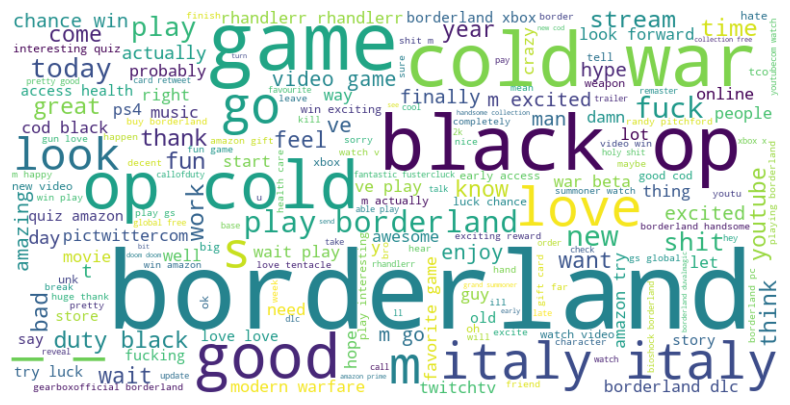

In [286]:
from wordcloud import WordCloud

# Convert the column to a single string
text = df['message_lemmatized'].astype(str).str.cat(sep=" ")

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let's a word cloud of the +ve sentences and the -ve according to the data

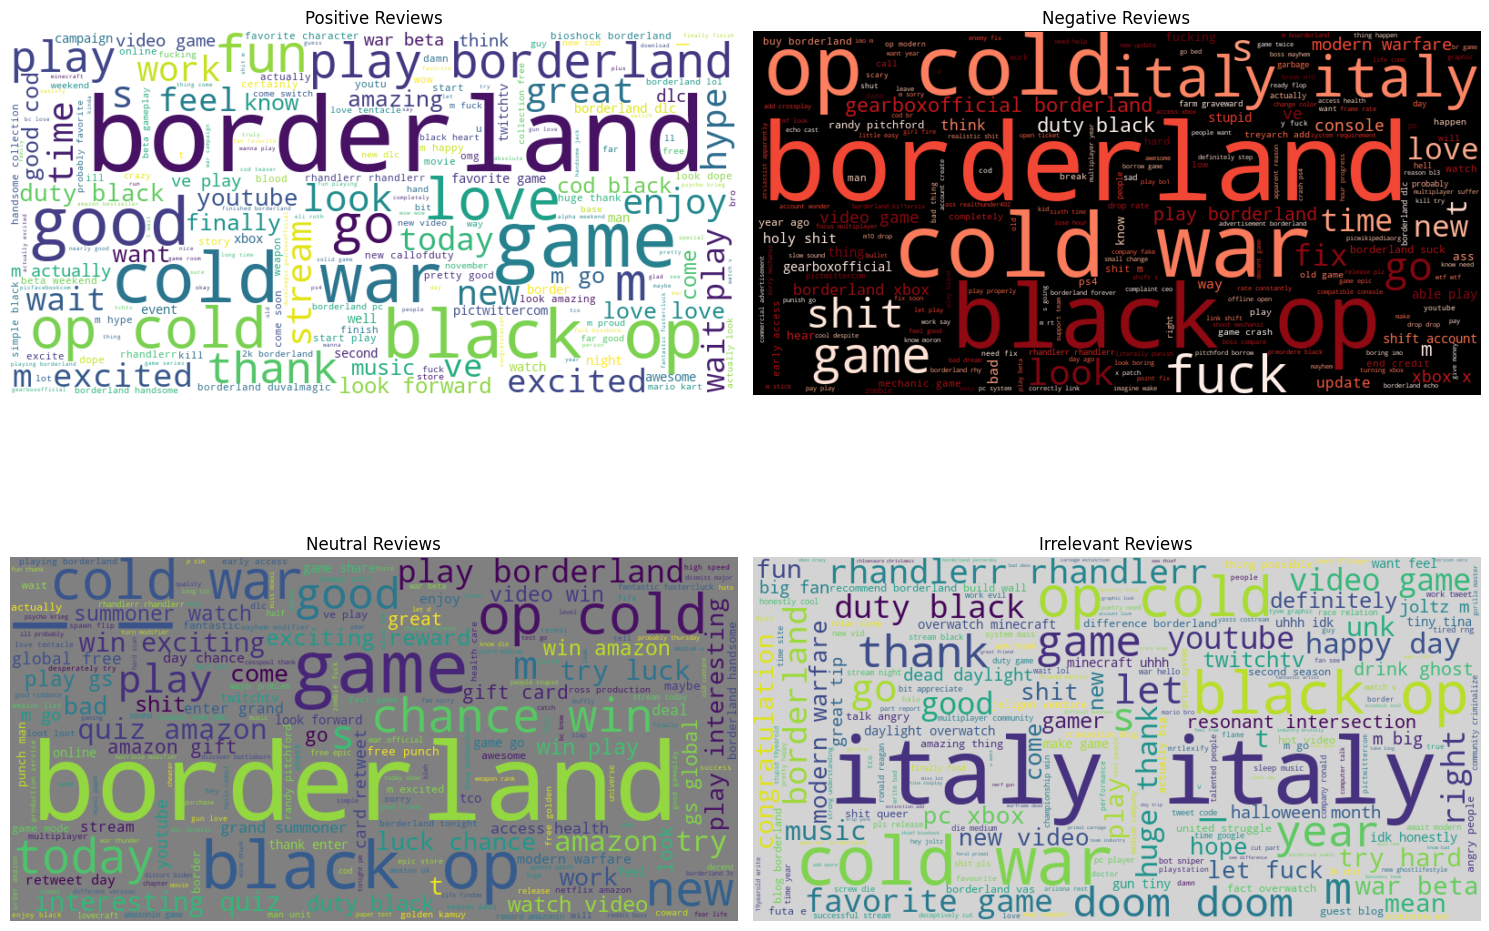

In [287]:
# Combine text data for each sentiment category
positive_text = " ".join(df[df["label"] == "Positive"]["message_lemmatized"])
negative_text = " ".join(df[df["label"] == "Negative"]["message_lemmatized"])
neutral_text = " ".join(df[df["label"] == "Neutral"]["message_lemmatized"])
irrelevant_text = " ".join(df[df["label"] == "Irrelevant"]["message_lemmatized"])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='gray').generate(neutral_text)
irrelevant_wordcloud = WordCloud(width=800, height=400, background_color='lightgray').generate(irrelevant_text)

# Plot word clouds
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

ax[0, 0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0, 0].set_title("Positive Reviews")
ax[0, 0].axis("off")

ax[0, 1].imshow(negative_wordcloud, interpolation='bilinear')
ax[0, 1].set_title("Negative Reviews")
ax[0, 1].axis("off")

ax[1, 0].imshow(neutral_wordcloud, interpolation='bilinear')
ax[1, 0].set_title("Neutral Reviews")
ax[1, 0].axis("off")

ax[1, 1].imshow(irrelevant_wordcloud, interpolation='bilinear')
ax[1, 1].set_title("Irrelevant Reviews")
ax[1, 1].axis("off")

plt.tight_layout()
plt.show()

from this word cloud we can remove the word game as it's illogical to exist in every class !

In [288]:
df["message_lemmatized"] = df["message_lemmatized"].str.replace(r'\bgame\b', '', regex=True)

Pre-Processing for the Target

In [289]:
# I'm going to mix the neutral class with the Irrelevant
df['label'] = df['label'].map({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })

In [290]:
df['label'].value_counts()


label
2    1979
1    1927
0    1046
Name: count, dtype: int64

Split Data

In [291]:
from sklearn.model_selection import train_test_split

X = df['message_lemmatized'] # feature matrix ( in this case it's just a vectore cause it's only one column)
y = df['label'] # target column

X_train1 , X_test , y_train1 , y_test = train_test_split(X,y , random_state = 42 , test_size = 0.2  , shuffle = True)
X_train , X_val , y_train , y_val = train_test_split(X_train1 , y_train1 , random_state = 42 , test_size = 0.15  , shuffle = True)

Tokenization

In [292]:
import tensorflow as tf

In [293]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token = 'nothing')
tokenizer.fit_on_texts(X_train) # we call this method to build the tokenizer on the train data only to avoid data leakage !

In [295]:
#  returns the total number of documents (sentences) processed by the tokenizer
# just to make sure that all the sentences have been converted to tokens !

tokenizer.document_count


3366

Conversion to Sequence

In [296]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

In [297]:
# finding the max length
max_len = max(len(tokens) for tokens in X_train_seq)
print("Maximum sequence length (maxlen):", max_len)


Maximum sequence length (maxlen): 99


In [298]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Perform padding on X_train and X_test sequences and X_val

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

In [299]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded[:1])
print("\nX_test_padded:")
print(X_test_padded[:1])
print("\nX_val_padded:")
print(X_val_padded[:1])


X_train_padded:
[[ 353   72  119  371   73  216  120  853 1713  656   83   41   58   63
  2243  854 2874    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]]

X_test_padded:
[[  25   53    2   14  387 2310  158   26 1800 1801   73  140 1802    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  

I was plannig to use Glove as a pretrained model for vector embeddings and then finetune it with my data
but let's give training an embedding layer from scratch a try first !
However with what we got so far we can train the model directly but LSTM works well with vector embeddings

In [301]:
# Define vocab size based on the tokenizer
vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)

4301


In [302]:

model = tf.keras.models.Sequential([

    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128 , return_sequences = True , dropout = 0.2 , recurrent_dropout = 0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64 , dropout = 0.2 , recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(64 , activation='relu'  , kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(3 , activation = 'softmax')

])

In [303]:
# defining callbacks for Early stopping and changing the learning rate while training 

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [304]:
# compiling the model 

# Compile Model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [305]:
with tf.device('/device:GPU:0'):
  # Train the Model
  history = model.fit(
      X_train_padded,  
      y_train,  
      validation_data=(X_val_padded, y_val),  # Validation set
      batch_size=32,  
      epochs=30,  
      callbacks=[early_stopping , reduce_lr],  # to Prevent overfitting
      verbose=1 
  )

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.4074 - loss: 1.0563 - val_accuracy: 0.7513 - val_loss: 0.6098 - learning_rate: 0.0010
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8090 - loss: 0.4732 - val_accuracy: 0.8420 - val_loss: 0.3990 - learning_rate: 0.0010
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9310 - loss: 0.1963 - val_accuracy: 0.8571 - val_loss: 0.3691 - learning_rate: 0.0010
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9452 - loss: 0.1405 - val_accuracy: 0.8773 - val_loss: 0.3425 - learning_rate: 0.0010
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9564 - loss: 0.1052 - val_accuracy: 0.8958 - val_loss: 0.3294 - learning_rate: 0.0010
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9577 - loss: 0.1089 - val_accuracy: 0.8840 - val_loss: 0.3670 - learning_rate: 0.0010
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.9678 - loss

In [307]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 99, 100)        │       430,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 99, 256)        │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,512,199 (9.58 MB)

 Trainable params: 837,399 (3.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,674,800 (6.39 MB)

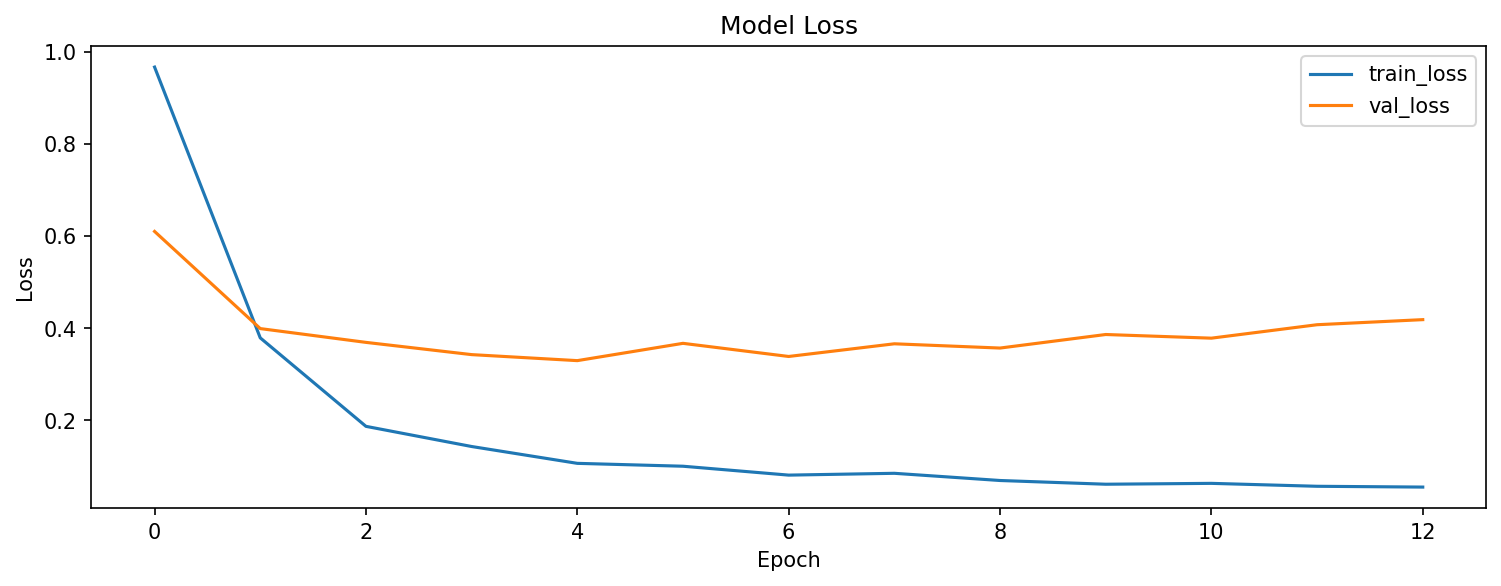

In [308]:
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

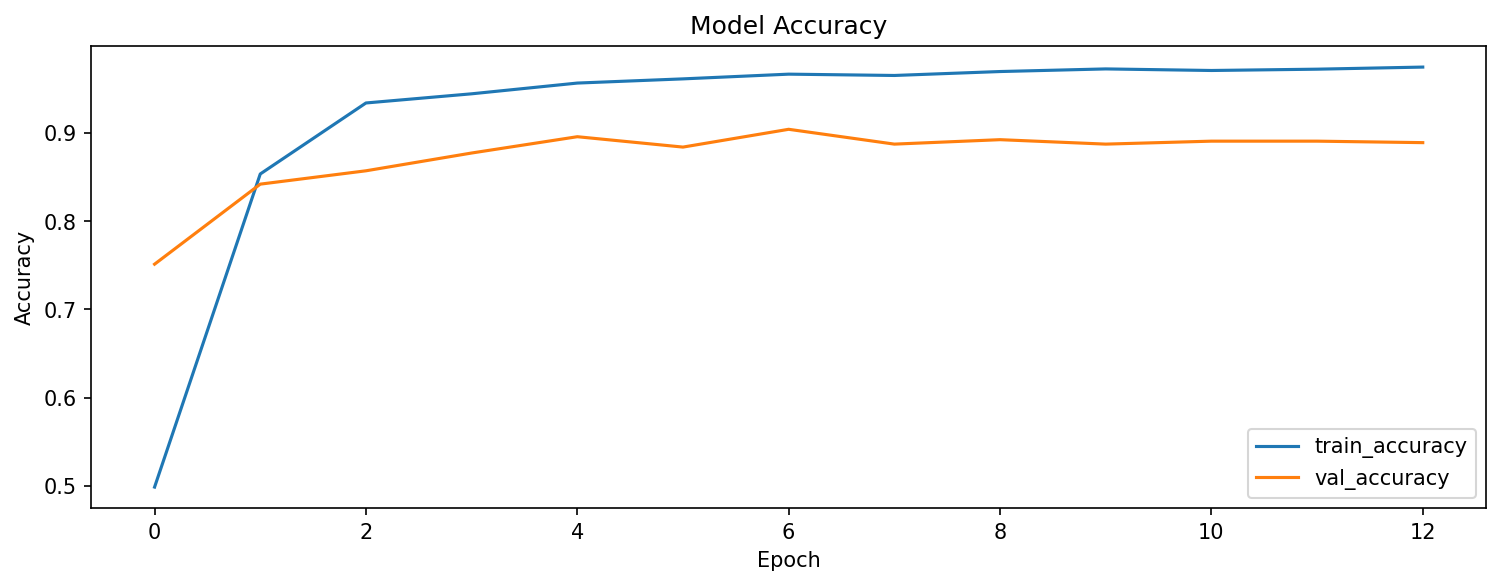

In [309]:
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [310]:
# Get model predictions (probabilities)
y_probs = model.predict(X_test_padded)

# Converting probs into Binary values
y_pred = np.argmax(y_probs, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [311]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8868 - loss: 0.2972
Loss: 0.2970992922782898, Accuracy: 0.8910191655158997


Confusion Matrix


In [312]:
from sklearn.metrics import confusion_matrix , classification_report

cfm = confusion_matrix(y_test , y_pred)

In [315]:
# classification report
report = classification_report(y_test, y_pred)

# the report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       196
           1       0.84      0.95      0.89       390
           2       0.93      0.86      0.90       405

    accuracy                           0.89       991
   macro avg       0.90      0.88      0.89       991
weighted avg       0.89      0.89      0.89       991



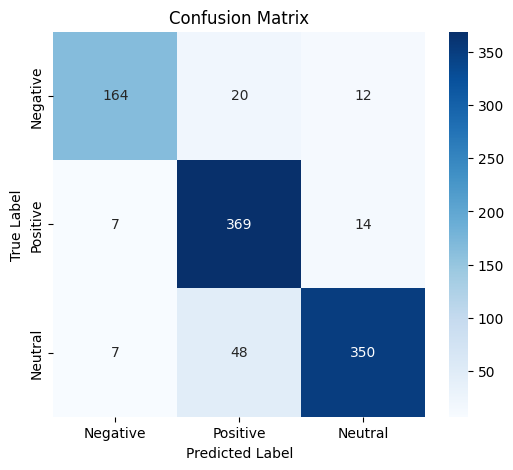

In [317]:
plt.figure(figsize=(6, 5))
sns.heatmap(cfm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative' , 'Positive' , 'Neutral'], yticklabels=['Negative' , 'Positive','Neutral'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

From the Confusion matrix we can conclude that the model is Okay

Saving the model and the tokenizer

In [318]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [319]:
# now the model 

model.save("LSTM_Sentiment_analysis.h5")

In [321]:
def preprocess_text(texts, tokenizer):
    """
    Preprocess new incoming text data.

    Args:
        texts (list of str): List of raw text inputs.
        tokenizer (Tokenizer): Pre-trained tokenizer.
        max_len (int): Maximum sequence length.

    Returns:
        np.array: Padded sequences ready for prediction.
    """
    # Convert text to sequences
    text_seq = tokenizer.texts_to_sequences(texts)
    
    # Apply padding
    text_padded = pad_sequences(text_seq, maxlen=max_len, padding="post")
    
    return text_padded

In [323]:
def Predict(text , model , tokenizer):
    
    text = [text]
    text = clean_text(text)
    text_padded =  preprocess_text(text , tokenizer)

    y_prob = model.predict(text_padded)
   
    y_pred = np.argmax(y_prob, axis=1)

    classes = ['Negative' , 'Positive' , 'Neutral']

    pred_class = classes[y_pred[0]]  # Get predicted class label
    pred_prob = y_prob[0][y_pred[0]] # get predicted prob


    return pred_class, pred_prob

Loading the model
Now if u want to use the model again without training it again
you can simply load it with the tokenzier

In [324]:
# loading the tokenizer

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)


# Load the saved model
loaded_model = tf.keras.models.load_model('LSTM_Sentiment_analysis.h5')

In [325]:
new_text = "Your product is really good, I love it!"

pred_class  , prob  = Predict(new_text , loaded_model , tokenizer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


In [326]:
print(f"Class Prediction is : {pred_class} with Probabilty {prob}")

Class Prediction is : Neutral with Probabilty 0.9279700517654419
